<div align="center" style="border-bottom: 0px;">
    <br>
    <b><h1 style="font-size: 34px;">Preprocesamiento de los datos</h1></b>
	<br>
</div>
<div align="right" style="border-bottom: 0px;">
    <h3 style="font-size: 14px;">Informe técnico del Trabajo Final de Máster</h3>
	<h3 style="font-size: 14px;">Autor: Sergi Payarol Calzado</h3>
    <h3 style="font-size: 14px;">Fecha: 15/11/2024</h3>
</div>
<hr style="border: 1px solid black; margin-top: 20px;">
<div style="position: relative;">
    <div style="position: absolute; bottom: 35px; left: 0;">
        <img src="logo_uoc.png" alt="Logo" style="width: Auto; height: 80px;">
    </div>
</div>

<b>Tabla de contenido</b><br>
<ul style="list-style-type:none">
    <li><a href='#1.-Introducción'>1. Introducción</a>
        <ul style="list-style-type:none">
            <li><a href="#1.1-Importación-de-librerías">1.1 Importación de librerías</a></li>
        </ul>
    </li>
    <li><a href='#2.-Métodos'>2. Métodos</a></li>
    <li><a href='#3.-Factores'>3. Factores</a>
        <ul style="list-style-type:none">
            <li><a href="#3.1-IBEX-35">3.1 IBEX-35</a></li>
            <li><a href="#3.2-Deuda-pública">3.2 Deuda pública</a></li>
            <li><a href="#3.3-Gasto-público">3.3 Gasto público</a></li>
            <li><a href="#3.4-PIB">3.4 PIB</a></li>
            <li><a href="#3.5-Tasa-de-desempleo">3.5 Tasa de desempleo</a></li>
            <li><a href="#3.6-Tipos-del-BCE">3.6 Tipos del BCE</a></li>
            <li><a href="#3.7-IPC">3.7 IPC</a></li>
            <li><a href="#3.8-Prima-de-riesgo">3.8 Prima de riesgo</a></li>
            <li><a href="#3.9-EURUSD">3.9 EURUSD</a></li>
            <li><a href="#3.10-Letras-del-tesoro-a-3-meses">3.10 Letras del tesoro a 3 meses</a></li>
        </ul>
    </li>
    <li><a href='#4.-Resultado-final'>4. Resultado final</a></li>
</ul>

# 1. Introducción

<p>En la etapa de preprocesamiento, se llevará a cabo la extracción de los datos y una revisión inicial para garantizar su calidad y consistencia.</p>

<p>Algunas de las series temporales han sido descargadas automáticamente mediante código, aprovechando APIs o paquetes especializados, mientras que otras se han obtenido manualmente desde fuentes oficiales.</p>

<p>Las series temporales que se utilizarán en este estudio son las siguientes:</p>

<h3><b>Variable dependiente</b></h3>
<ul>
    <li><a href="https://es.finance.yahoo.com/quote/%5EIBEX/history/">IBEX-35</a>: Índice bursátil representativo del mercado de valores español, usado como la variable objetivo para el modelo predictivo.</li>
</ul>

<h3><b>Variables predictoras</b></h3>
<ul>
    <li><a href="https://datosmacro.expansion.com/deuda/espana">Deuda pública de España</a>: Nivel total de la deuda emitida por el gobierno español, indicador clave de la sostenibilidad fiscal.</li>
    <li><a href="https://datosmacro.expansion.com/estado/gasto/espana">Gasto público</a>: Total de gastos realizados por el gobierno, reflejo de las políticas fiscales expansivas o restrictivas.</li>
    <li><a href="https://datosmacro.expansion.com/pib/espana">PIB de España</a>: Producto Interno Bruto, medida del crecimiento económico nacional.</li>
    <li><a href="https://datosmacro.expansion.com/paro/espana">Tasa de desempleo</a>: Porcentaje de la población activa que se encuentra desempleada, indicador clave del mercado laboral.</li>
    <li><a href="https://datosmacro.expansion.com/tipo-interes/zona-euro">Tipos del BCE</a>: Tipos de interés fijados por el Banco Central Europeo, que afectan directamente a las condiciones de financiación.</li>
    <li><a href="https://www.inflation.eu/es/tasas-de-inflacion/espana/inflacion-historica/ipc-inflacion-espana.aspx">IPC</a>: Índice de Precios al Consumo, medida de la inflación y del poder adquisitivo de los consumidores.</li>
    <li><a href="https://es.investing.com/rates-bonds/de-10y-vs-es-10y-historical-data">Prima de riesgo</a>: Diferencia entre el rendimiento de los bonos españoles y el bono alemán a 10 años, indicador de confianza en la economía.</li>
    <li><a href="https://finance.yahoo.com/quote/EURUSD%3DX/">EUR/USD</a>: Tipo de cambio entre el euro y el dólar estadounidense, indicador de competitividad internacional.</li>
    <li><a href="https://datosmacro.expansion.com/deuda/espana/tesoro/letras-3-meses">Letras del tesoro a 3 meses</a>: Rendimiento de los bonos a corto plazo emitidos por el gobierno español, indicador de las expectativas del mercado sobre la política monetaria y fiscal.</li>
</ul>

## 1.1 Importación de librerías

In [1]:
import yfinance as yf
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# 2. Métodos

In [62]:
def check_range_dates(df, start, end, freq="B"):
    """
    Checks if the time series in the DataFrame 'df' contains all the dates in the specified range,
    based on the given frequency. It identifies and prints any missing dates within the range.

    Parameters:
    df (DataFrame): The pandas DataFrame containing the time series data with a 'fecha' column (date values).
    start (str or datetime-like): The start date of the range (e.g., "1994-01-01").
    end (str or datetime-like): The end date of the range (e.g., "2024-09-01").
    freq (str): Frequency of the date range. Default is 'B' (business days).
                Other examples include 'D' (daily) or 'M' (monthly).

    Returns:
    None: This function does not return any value, but prints out the result to the console.
    """
    rango_fechas_completo = pd.date_range(start=start, end=end, freq=freq)
    
    df.loc[:, 'fecha'] = pd.to_datetime(df['fecha'])

    
    if freq == "Ms":
        df_fechas_mensuales = df['fecha'].dt.to_period('M').drop_duplicates().dt.to_timestamp()
        fechas_faltantes = rango_fechas_completo.difference(df_fechas_mensuales)
    else:  
        fechas_faltantes = rango_fechas_completo.difference(df['fecha'])

    if fechas_faltantes.empty:
        print(f"The time series contains all the dates from {start} to {end} based on {freq} frequency.")
    else:
        print("The time series is missing the following dates:")
        print(fechas_faltantes)


        
def print_plot(df, valor):
    """
    Plots a time series from the 'df' DataFrame, displaying the specified 'valor' column over time.

    Parameters:
    df (DataFrame): The pandas DataFrame containing the time series data with a 'fecha' column (date values).
    valor (str): The name of the column to be plotted, containing the numerical data to visualize.

    Returns:
    None: This function does not return any value, but displays the plot in a graphical window.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(df['fecha'], df[valor], label='Serie Temporal', color='b')
    plt.xlabel('Fecha')
    plt.ylabel('Valor')
    plt.title(f'Serie Temporal de {valor}')
    plt.grid(True)
    plt.show()

    
def convertir_trimestre_a_fecha(trimestre):
    """
    Converts a string representing a quarter into a corresponding date.
    The date corresponds to the first day of the first month of the quarter.

    Parameters:
    trimestre (str): A string representing the quarter in the format "Q [roman numeral] [year]" 
                     (e.g., "I 2023", "IV 2022").

    Returns:
    datetime: A pandas datetime object representing the first day of the specified quarter.
    
    Raises:
    ValueError: If the quarter part of the input string does not match 'I', 'II', 'III', or 'IV'.
    """
    parts = trimestre.split()
    year = parts[2]
    quarter = parts[0]
    
    if quarter == 'I':
        month = 1
    elif quarter == 'II':
        month = 4
    elif quarter == 'III':
        month = 7
    elif quarter == 'IV':
        month = 10
    else:
        raise ValueError(f"Trimestre desconocido: {quarter}")
    
    return pd.to_datetime(f"{year}-{month:02d}-01")

# 3. Factores

## 3.1 IBEX-35

In [3]:
ticker_ibex = "^IBEX"

ibex = yf.download(ticker_ibex, interval="1d")

[*********************100%%**********************]  1 of 1 completed


In [4]:
ibex = ibex.reset_index()
ibex.rename(columns={'Date': 'fecha', 'Close': 'ibex_close', 'Volume': 'ibex_volume'}, inplace=True)
ibex = ibex[['fecha', 'ibex_close', 'ibex_volume']]
ibex = ibex[(ibex['fecha'] >= "1994-01-01") & (ibex['fecha'] <= "2024-09-01")]
ibex

,fecha,ibex_close,ibex_volume
120,1994-01-03,3654.500000,0
121,1994-01-04,3630.300049,0
122,1994-01-05,3621.199951,0
123,1994-01-07,3636.399902,0
124,1994-01-10,3660.600098,0
...,...,...,...
7883,2024-08-26,11265.500000,60317600
7884,2024-08-27,11326.900391,96013500
7885,2024-08-28,11332.000000,78994900
7886,2024-08-29,11358.599609,77347600


In [14]:
check_range_dates(ibex, "1994-01-01", "2024-09-01")

The time series is missing the following dates:
DatetimeIndex(['1994-01-06', '1994-04-01', '1994-04-04', '1994-05-02',
               '1994-10-12', '1994-11-01', '1994-11-09', '1994-12-06',
               '1994-12-08', '1994-12-26',
               ...
               '2022-12-26', '2023-04-07', '2023-04-10', '2023-05-01',
               '2023-12-25', '2023-12-26', '2024-01-01', '2024-03-29',
               '2024-04-01', '2024-05-01'],
              dtype='datetime64[ns]', length=232, freq=None)


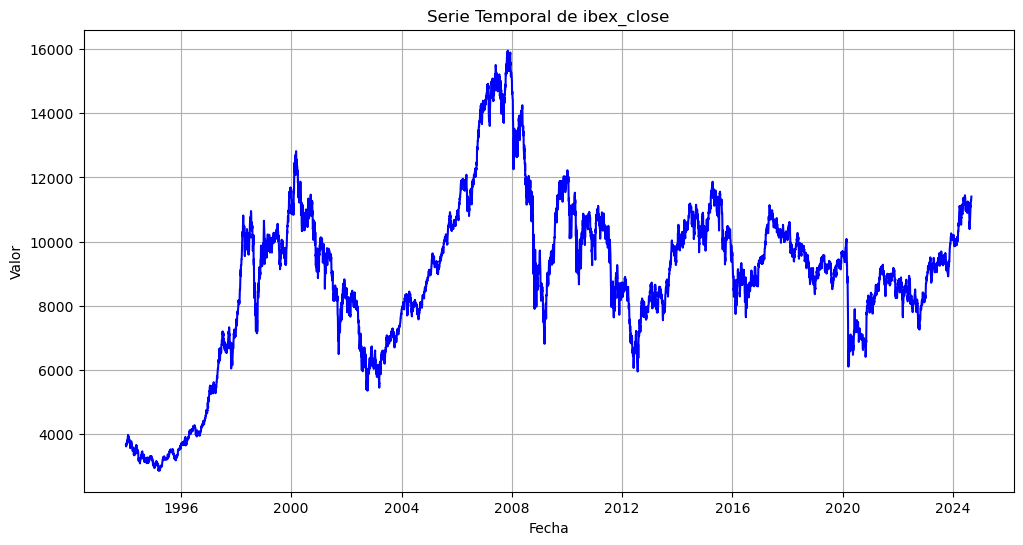

In [13]:
print_plot(ibex, "ibex_close")

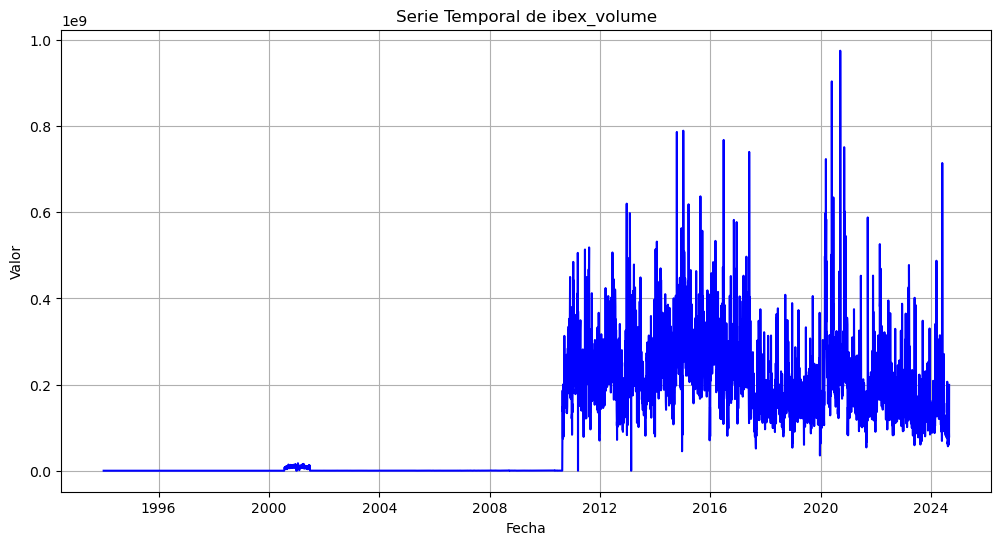

In [8]:
print_plot(ibex, "ibex_volume")

**Observaciones**


Ambos conjuntos de datos (ibex_close y ibex_volume) tienen la misma cantidad de días antes y después del procesamiento (7768 días), lo que indica que no faltan datos.

El rango de fechas abarca desde el 1994/01/03 hasta el 2024/08/30, lo que cubre un período extenso y adecuado para el análisis temporal.

Los datos se han extraído con frecuencia diaria y los valores faltantes corresponden a festivos como por ejemplo el 2024-05-01 día de los  o 2023-12-25 Navidad, etc.

## 3.2 Deuda pública



In [17]:
deuda = pd.read_excel("datos/deuda.xlsx")
deuda

,fecha,deuda_total_M,deuda_perc_pib,deuda_per_capita
0,Agosto 2024,1622908,107.81,33.258
1,2024-07-01 00:00:00,1617596,107.46,33.149
2,Junio 2024,1626065,108.02,33.322
3,Mayo 2024,1601747,108.01,32.937
4,2024-04-01 00:00:00,1606139,108.31,33.028
...,...,...,...,...
351,Mayo 1995,262931,60.62,6.633
352,1995-04-01 00:00:00,259881,59.91,6.556
353,Marzo 1995,261636,60.32,6.600
354,Febrero 1995,259119,60.96,6.537


In [18]:
meses = {
    "Enero": "01", "Febrero": "02", "Marzo": "03", "Abril": "04",
    "Mayo": "05", "Junio": "06", "Julio": "07", "Agosto": "08",
    "Septiembre": "09", "Octubre": "10", "Noviembre": "11", "Diciembre": "12"
}

def convertir_a_fecha(texto):
    for mes, numero in meses.items():
        texto = re.sub(mes, numero, texto)
    fecha = datetime.strptime(texto, "%m %Y")
    return fecha.strftime("%Y-%m-%d")

fechas = []
for fecha in deuda.fecha:
    if str(type(fecha)) == "<class 'datetime.datetime'>":
        fechas.append(pd.to_datetime(fecha).strftime("%Y-%m-%d"))
    else:
        fechas.append(convertir_a_fecha(fecha))

deuda.fecha = fechas
deuda

,fecha,deuda_total_M,deuda_perc_pib,deuda_per_capita
0,2024-08-01,1622908,107.81,33.258
1,2024-07-01,1617596,107.46,33.149
2,2024-06-01,1626065,108.02,33.322
3,2024-05-01,1601747,108.01,32.937
4,2024-04-01,1606139,108.31,33.028
...,...,...,...,...
351,1995-05-01,262931,60.62,6.633
352,1995-04-01,259881,59.91,6.556
353,1995-03-01,261636,60.32,6.600
354,1995-02-01,259119,60.96,6.537


In [48]:
check_range_dates(deuda, "1995-01-01", "2024-09-01", "MS")

The time series is missing the following dates:
DatetimeIndex(['1995-01-01', '1995-04-01', '1995-05-01', '1995-07-01',
               '1995-10-01', '1995-11-01', '1996-01-01', '1996-05-01',
               '1996-06-01', '1996-09-01',
               ...
               '2023-01-01', '2023-04-01', '2023-05-01', '2023-07-01',
               '2023-10-01', '2024-01-01', '2024-04-01', '2024-05-01',
               '2024-06-01', '2024-09-01'],
              dtype='datetime64[ns]', length=156, freq=None)


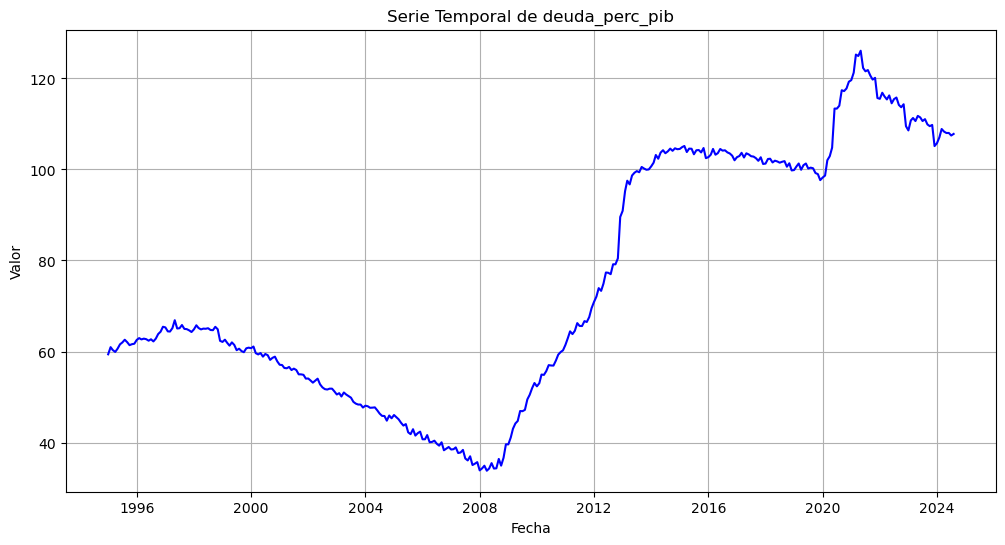

In [21]:
deuda.sort_values(by="fecha").reset_index().drop(columns=["index"], inplace = True)
print_plot(deuda, "deuda_perc_pib")

Hacemos un forward fill

In [22]:
fechas = pd.date_range(start="1995-01-01", end="2024-09-01", freq="D")
deuda["fecha"] = pd.to_datetime(deuda["fecha"])

df_fechas = pd.DataFrame(fechas, columns=["fecha"])

df_completo = pd.merge(df_fechas, deuda, on="fecha", how="left")
df_completo["deuda_perc_pib"] = df_completo["deuda_perc_pib"].ffill()
deuda = df_completo[["fecha", "deuda_perc_pib"]]
deuda = deuda[deuda["fecha"].isin(ibex["fecha"])]
deuda

,fecha,deuda_perc_pib
1,1995-01-02,59.39
2,1995-01-03,59.39
3,1995-01-04,59.39
4,1995-01-05,59.39
8,1995-01-09,59.39
...,...,...
10830,2024-08-26,107.81
10831,2024-08-27,107.81
10832,2024-08-28,107.81
10833,2024-08-29,107.81


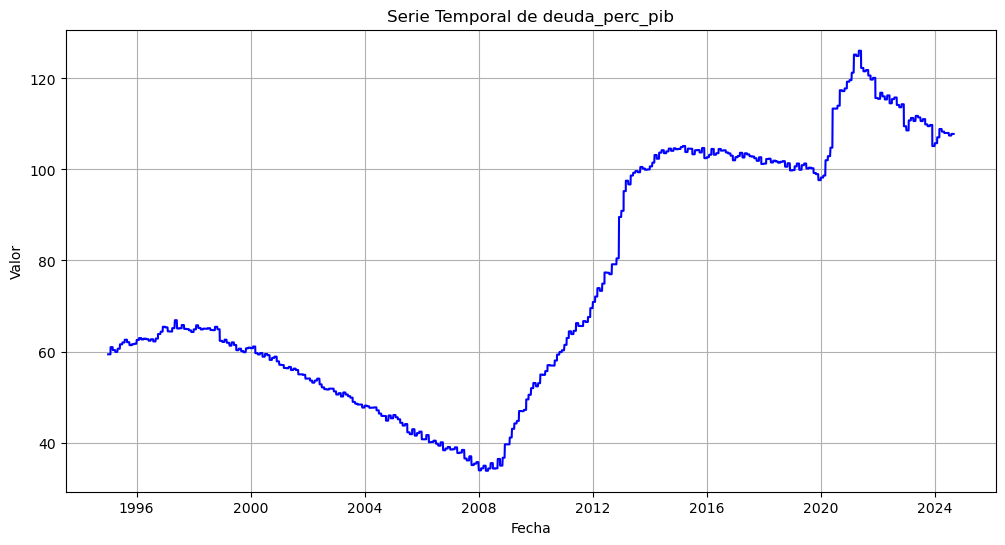

In [23]:
print_plot(deuda, "deuda_perc_pib")

**Observaciones**


Los días totales pasaron de 356 a 7518 tras el preprocesamiento con ffill().

El rango cubre desde 1995/01/02 hasta 2024/08/30.

Originalmente mensual, los datos se han ajustado a una frecuencia diaria para alinearse con la serie del IBEX-35.

## 3.3 Gasto público

In [24]:
gasto = pd.read_excel("datos/gasto_publico.xlsx")
gasto.sort_values("fecha", inplace=True)
gasto.reset_index(drop=True, inplace=True)
gasto

,fecha,gasto_pub_M,gasto_perc_PIB,gasto_per_capita
0,1994,191639.0,44.83,4.835
1,1995,207280.2,44.10,5.150
2,1996,216929.3,42.90,5.368
3,1997,215947.1,41.50,5.316
4,1998,226510.4,41.00,5.551
5,1999,237779.0,39.90,5.797
6,2000,253267.0,39.10,6.132
7,2001,269195.0,38.40,6.459
8,2002,289527.0,38.60,6.868
9,2003,307796.0,38.30,7.161


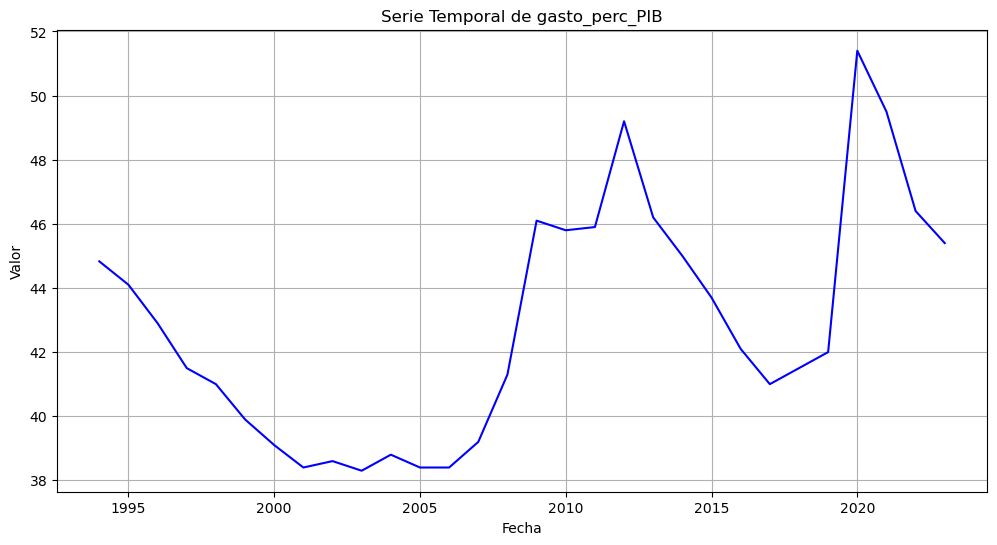

In [25]:
print_plot(gasto, "gasto_perc_PIB")

Hacemos un forward fill

In [26]:
gasto['fecha'] = pd.to_datetime(gasto['fecha'].astype(str) + '-01-01')

fechas = pd.date_range(start="1994-01-01", end="2024-09-01", freq="D")

df_fechas = pd.DataFrame(fechas, columns=["fecha"])

df_completo = pd.merge(df_fechas, gasto, on="fecha", how="left")
df_completo["gasto_perc_PIB"] = df_completo["gasto_perc_PIB"].ffill()
gasto = df_completo[["fecha", "gasto_perc_PIB"]]
gasto = gasto[gasto["fecha"].isin(ibex["fecha"])]
gasto

,fecha,gasto_perc_PIB
2,1994-01-03,44.83
3,1994-01-04,44.83
4,1994-01-05,44.83
6,1994-01-07,44.83
9,1994-01-10,44.83
...,...,...
11195,2024-08-26,45.40
11196,2024-08-27,45.40
11197,2024-08-28,45.40
11198,2024-08-29,45.40


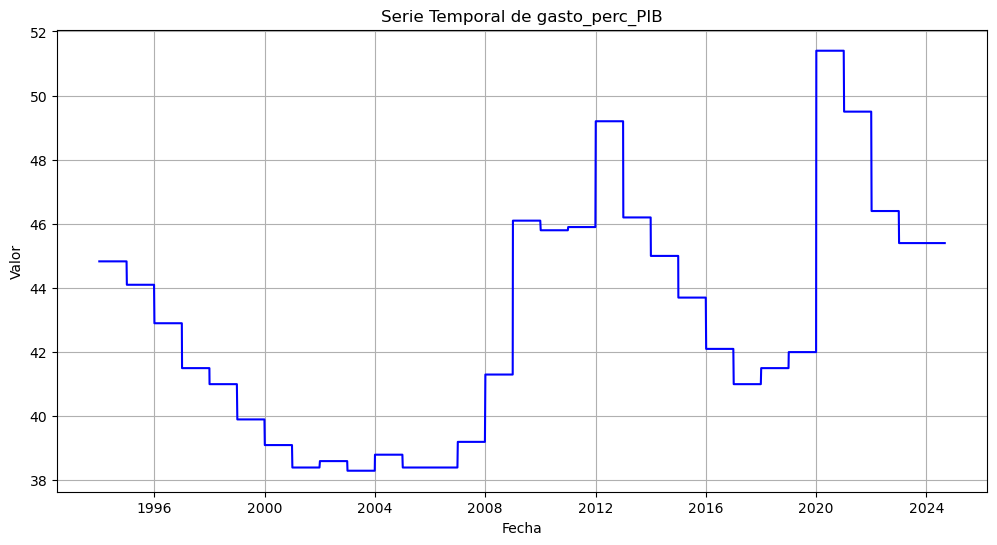

In [27]:
print_plot(gasto, "gasto_perc_PIB")

**Obervaciones**

Los días totales aumentaron de 30 a 7768 tras el preprocesamiento con ffill()

El rango abarca desde 1994/01/03 hasta 2023/12/31.

Los datos originalmente anuales fueron transformados a una frecuencia diaria.

## 3.4 PIB

In [87]:
pib = pd.read_excel("datos/pib.xlsx")
pib = pib[["fecha", "pib_trim_per_capita"]].copy()
pib

,fecha,pib_trim_per_capita
0,II Trim 2024,"7,871"
1,I Trim 2024,"7,831"
2,IV Trim 2023,"7,720"
3,III Trim 2023,"7,543"
4,II Trim 2023,"7,476"
...,...,...
117,I Trim 1995,"2,800"
118,IV Trim 1994,"2,800"
119,III Trim 1994,"2,700"
120,II Trim 1994,"2,700"


In [39]:
print(pib.dtypes)

fecha                  object
pib_trim_per_capita    object
dtype: object


Hacemos replace de comas por puntos.

In [88]:
pib['pib_trim_per_capita'] = pib['pib_trim_per_capita'].str.strip()

pib["pib_trim_per_capita"] = pd.to_numeric(pib["pib_trim_per_capita"].str.replace(",", "."), errors="coerce")

Hacemos forward fill.

In [89]:
pib['fecha'] = pib['fecha'].apply(convertir_trimestre_a_fecha)

fechas = pd.date_range(start="1994-01-01", end="2024-09-01", freq="D")

df_fechas = pd.DataFrame(fechas, columns=["fecha"])

df_completo = pd.merge(df_fechas, pib, on="fecha", how="left")
df_completo["pib_trim_per_capita"] = df_completo["pib_trim_per_capita"].ffill()
pib = df_completo[["fecha", "pib_trim_per_capita"]]
pib.set_index('fecha', inplace=True)
pib = pib.asfreq('B')
pib = pib.reset_index()
pib = pib[pib["fecha"].isin(ibex["fecha"])]
pib

,fecha,pib_trim_per_capita
0,1994-01-03,2.700
1,1994-01-04,2.700
2,1994-01-05,2.700
4,1994-01-07,2.700
5,1994-01-10,2.700
...,...,...
7995,2024-08-26,7.871
7996,2024-08-27,7.871
7997,2024-08-28,7.871
7998,2024-08-29,7.871


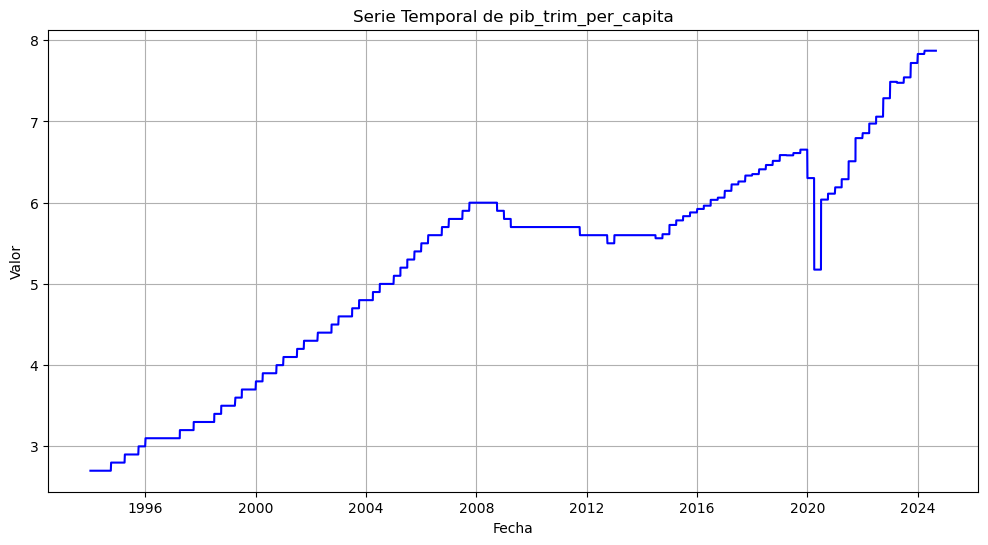

In [37]:
print_plot(pib, "pib_trim_per_capita")

**Obervaciones**

Los días totales aumentaron de 122 a 7768 tras el preprocesamiento con ffill().

El rango abarca desde 1994/01/03 hasta 2024/08/30.

Los datos originalmente trimestrales fueron transformados a una frecuencia diaria.

## 3.5 Tasa de desempleo


In [40]:
desempleo = pd.read_excel("datos/tasa_desempleo.xlsx")
desempleo

,fecha,tasa_desempleo
0,Septiembre 2024,11.2
1,Agosto 2024,11.3
2,2024-07-01 00:00:00,11.4
3,Junio 2024,11.5
4,Mayo 2024,11.6
...,...,...
364,Mayo 1994,22.2
365,1994-04-01 00:00:00,22.2
366,Marzo 1994,22.2
367,Febrero 1994,22.3


Estandarizamos el campo fecha.

In [41]:
fechas = []

for fecha in desempleo.fecha:
    if str(type(fecha)) == "<class 'datetime.datetime'>":
        fechas.append(pd.to_datetime(fecha).strftime("%Y-%m-%d"))
    else:
        fechas.append(convertir_a_fecha(fecha))

desempleo.fecha = fechas
desempleo

,fecha,tasa_desempleo
0,2024-09-01,11.2
1,2024-08-01,11.3
2,2024-07-01,11.4
3,2024-06-01,11.5
4,2024-05-01,11.6
...,...,...
364,1994-05-01,22.2
365,1994-04-01,22.2
366,1994-03-01,22.2
367,1994-02-01,22.3


In [49]:
check_range_dates(desempleo, "1994-01-01", "2024-09-01", "MS")

The time series contains all the dates from 1994-01-01 to 2024-09-01 based on MS frequency.


In [50]:
fechas = pd.date_range(start="1994-01-01", end="2024-09-01", freq="D")
desempleo["fecha"] = pd.to_datetime(desempleo["fecha"])

df_fechas = pd.DataFrame(fechas, columns=["fecha"])

df_completo = pd.merge(df_fechas, desempleo, on="fecha", how="left")
df_completo["tasa_desempleo"] = df_completo["tasa_desempleo"].ffill()
desempleo = df_completo[["fecha", "tasa_desempleo"]]
desempleo = desempleo[desempleo["fecha"].isin(ibex["fecha"])]
desempleo

,fecha,tasa_desempleo
2,1994-01-03,22.2
3,1994-01-04,22.2
4,1994-01-05,22.2
6,1994-01-07,22.2
9,1994-01-10,22.2
...,...,...
11195,2024-08-26,11.3
11196,2024-08-27,11.3
11197,2024-08-28,11.3
11198,2024-08-29,11.3


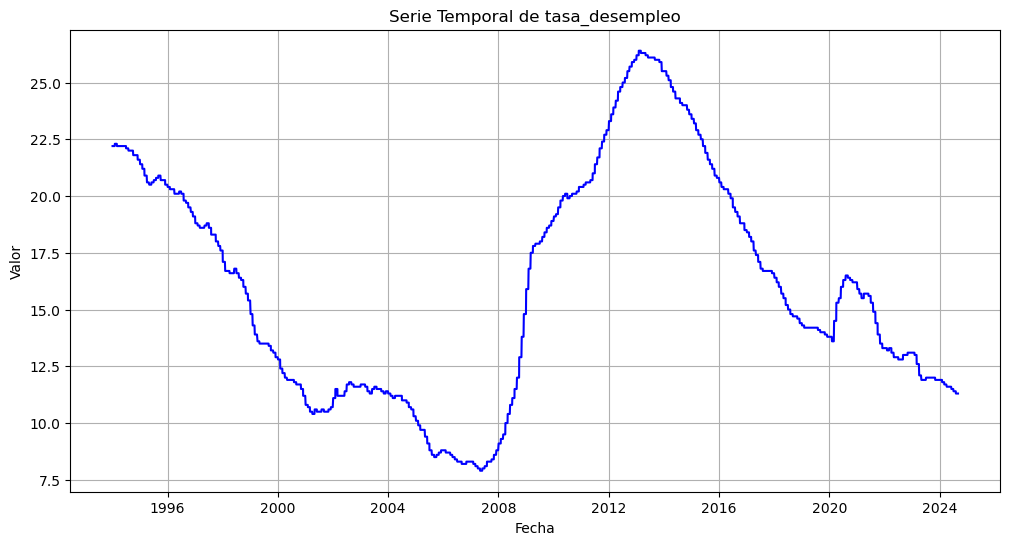

In [51]:
print_plot(desempleo, "tasa_desempleo")

**Obervaciones**

Los días totales aumentaron de 369 a 7768 tras el preprocesamiento con ffill().

El rango abarca desde 1994/01/03 hasta 2024/08/30.

Los datos originalmente mensuales fueron transformados a una frecuencia diaria.

## 3.6 Tipos del BCE


In [52]:
tie = pd.read_excel("datos/tie.xlsx")
tie

,fecha,tie
0,2024-10-23,3.40
1,2024-09-18,3.65
2,2024-06-12,4.25
3,2023-09-20,4.50
4,2023-08-02,4.25
...,...,...
57,1999-11-05,3.00
58,1999-04-09,2.50
59,1999-01-22,3.00
60,1999-01-04,3.00


Hacemos forward fill.

In [53]:
fechas = pd.date_range(start="1999-01-01", end="2024-09-01", freq="D")
tie["fecha"] = pd.to_datetime(tie["fecha"])

df_fechas = pd.DataFrame(fechas, columns=["fecha"])

df_completo = pd.merge(df_fechas, tie, on="fecha", how="left")
df_completo["tie"] = df_completo["tie"].ffill()
tie = df_completo[["fecha", "tie"]]
tie = tie[tie["fecha"].isin(ibex["fecha"])]
tie

,fecha,tie
3,1999-01-04,3.00
4,1999-01-05,3.00
6,1999-01-07,3.00
7,1999-01-08,3.00
10,1999-01-11,3.00
...,...,...
9369,2024-08-26,4.25
9370,2024-08-27,4.25
9371,2024-08-28,4.25
9372,2024-08-29,4.25


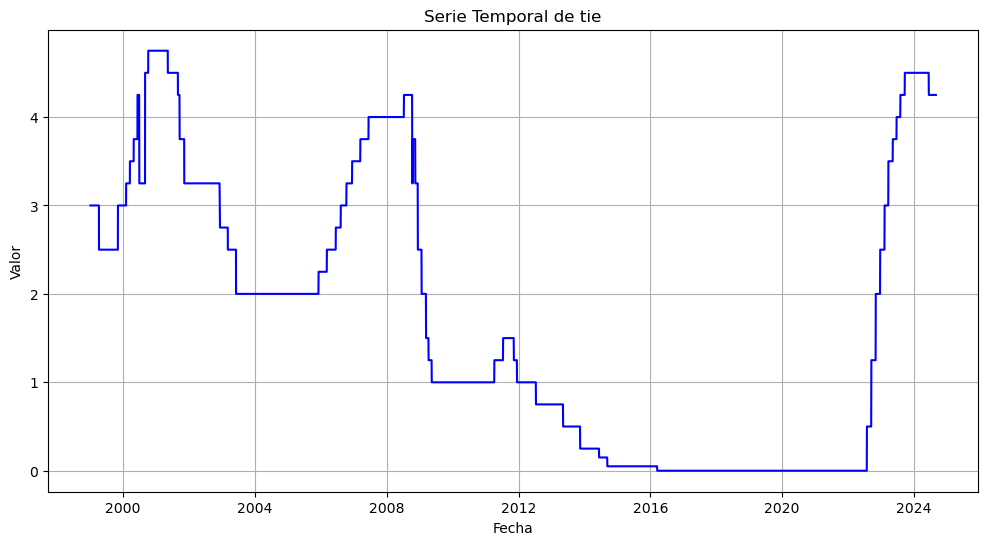

In [54]:
print_plot(tie, "tie")

**Obervaciones**

Los días totales aumentaron de 62 a 6523 tras el preprocesamiento con ffill().

El rango abarca desde 1999/01/04 hasta 2024/08/30.

Los datos originalmente de frecuencia irregular fueron transformados a una frecuencia diaria.

## 3.7 IPC


In [55]:
ipc = pd.read_excel("datos/ipc.xlsx")
ipc['inflacion'] = ipc['inflacion'].str.strip()
ipc['inflacion'].fillna(0, inplace=True)
ipc['inflacion'] = pd.to_numeric(ipc['inflacion'], errors='coerce')
ipc

,fecha,inflacion
0,2024-09-01,-0.60
1,2024-08-01,0.00
2,2024-07-01,-0.50
3,2024-06-01,0.40
4,2024-05-01,0.30
...,...,...
364,1994-05-01,0.20
365,1994-04-01,0.39
366,1994-03-01,0.33
367,1994-02-01,0.04


In [57]:
ipc = ipc[(ipc['fecha'] >= "1994-01-01") & (ipc['fecha'] <= "2024-09-01")]
check_range_dates(ipc, "1994-01-01", "2024-09-01", "MS")

The time series contains all the dates from 1994-01-01 to 2024-09-01 based on MS frequency.


Hacemos forward fill.

In [58]:
fechas = pd.date_range(start="1994-01-01", end="2024-09-01", freq="D")
ipc["fecha"] = pd.to_datetime(ipc["fecha"])

df_fechas = pd.DataFrame(fechas, columns=["fecha"])

df_completo = pd.merge(df_fechas, ipc, on="fecha", how="left")
df_completo["inflacion"] = df_completo["inflacion"].ffill()
ipc = df_completo[["fecha", "inflacion"]]
ipc = ipc[ipc["fecha"].isin(ibex["fecha"])]
ipc.rename(columns={'inflacion': 'ipc'}, inplace = True)
ipc

,fecha,ipc
2,1994-01-03,1.01
3,1994-01-04,1.01
4,1994-01-05,1.01
6,1994-01-07,1.01
9,1994-01-10,1.01
...,...,...
11195,2024-08-26,0.00
11196,2024-08-27,0.00
11197,2024-08-28,0.00
11198,2024-08-29,0.00


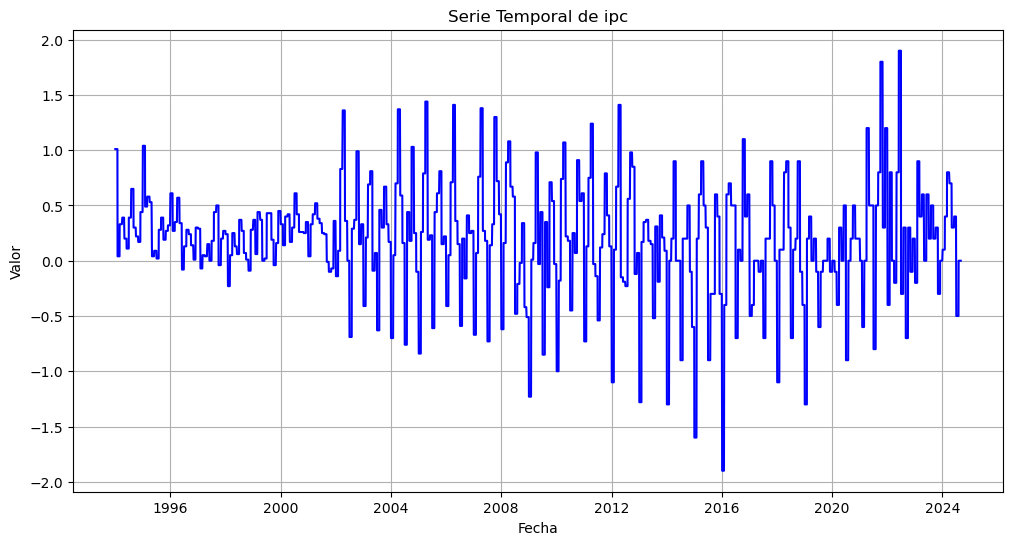

In [59]:
print_plot(ipc, "ipc")

**Obervaciones**

Los días totales aumentaron de 369 a 7768 tras el preprocesamiento con ffill().

El rango abarca desde 1994/01/03 hasta 2024/08/30.

Los datos originalmente mensuales fueron transformados a una frecuencia diaria.

## 3.8 Prima de riesgo

In [60]:
prima = pd.read_excel("datos/prima.xlsx")
prima

,Fecha,Prima Riesgo,VariaciÃ³n
0,1994-01-31,206,-5.00
1,1994-01-28,211,3.00
2,1994-01-27,208,-7.00
3,1994-01-26,215,5.00
4,1994-01-25,210,-6.00
...,...,...,...
8006,2024-10-07,76,1.25
8007,2024-10-04,75,-4.20
8008,2024-10-03,79,-0.40
8009,2024-10-02,80,0.00


In [64]:
prima = prima.rename(columns={'Fecha': 'fecha', 'Prima Riesgo': 'prima'})
prima = prima[(prima['fecha'] >= "1994-01-01") & (prima['fecha'] <= "2024-09-01")]
check_range_dates(prima, "1994-01-01", "2024-09-01")

The time series is missing the following dates:
DatetimeIndex(['1994-01-06', '1994-03-31', '1994-04-01', '1994-04-04',
               '1994-05-12', '1994-05-23', '1994-06-02', '1994-09-09',
               '1994-09-28', '1994-10-03',
               ...
               '2015-12-25', '2016-03-25', '2016-03-28', '2017-04-14',
               '2017-05-01', '2018-04-02', '2018-05-01', '2020-01-01',
               '2020-04-10', '2020-12-25'],
              dtype='datetime64[ns]', length=151, freq=None)


In [65]:
fechas = pd.date_range(start="1994-01-01", end="2024-09-01", freq="D")
prima["fecha"] = pd.to_datetime(prima["fecha"])

df_fechas = pd.DataFrame(fechas, columns=["fecha"])

df_completo = pd.merge(df_fechas, prima, on="fecha", how="left")
df_completo["prima"] = df_completo["prima"].ffill()
prima = df_completo[["fecha", "prima"]]
prima = prima[prima["fecha"].isin(ibex["fecha"])]
prima

,fecha,prima
2,1994-01-03,248.0
3,1994-01-04,252.0
4,1994-01-05,256.0
6,1994-01-07,258.0
9,1994-01-10,255.0
...,...,...
11195,2024-08-26,80.0
11196,2024-08-27,80.0
11197,2024-08-28,83.0
11198,2024-08-29,82.0


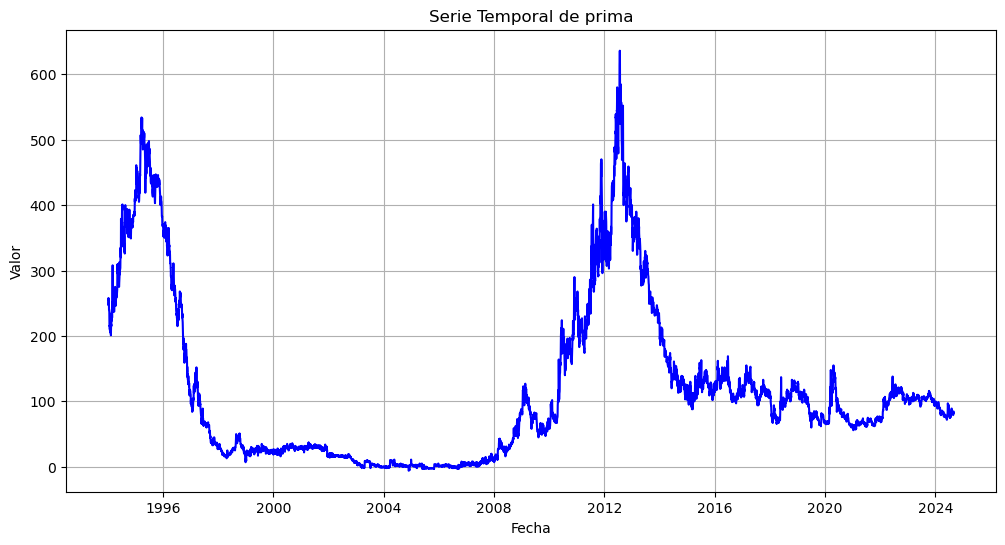

In [66]:
print_plot(prima, "prima")

**Obervaciones**

Los días totales disminuyeron de 8011 a 7768 tras el preprocesamiento con ffill().

El rango abarca desde 1994/01/03 hasta 2024/08/30.

Los datos originalmente diarios fueron ajustados para garantizar la continuidad y consistencia en la serie temporal con el IBEX-35.

## 3.9 EURUSD

In [74]:
ticker_eurusd = "EURUSD=X"

eurusd = yf.download(ticker_eurusd, interval="1d")
eurusd.to_csv("eurusd.csv")
eurusd = eurusd.reset_index()
eurusd.rename(columns={'Date': 'fecha'}, inplace=True)
eurusd["fecha"] = pd.to_datetime(eurusd["fecha"])
eurusd = eurusd[(eurusd['fecha'] >= "2003-12-01") & (eurusd['fecha'] <= "2024-09-01")]
eurusd

[*********************100%%**********************]  1 of 1 completed


,fecha,Open,High,Low,Close,Adj Close,Volume
0,2003-12-01,1.203398,1.204007,1.194401,1.196501,1.196501,0
1,2003-12-02,1.196101,1.210903,1.194600,1.208897,1.208897,0
2,2003-12-03,1.209000,1.213003,1.207700,1.212298,1.212298,0
3,2003-12-04,1.212004,1.214403,1.204398,1.208094,1.208094,0
4,2003-12-05,1.207802,1.219096,1.206593,1.218695,1.218695,0
...,...,...,...,...,...,...,...
5381,2024-08-26,1.118793,1.120109,1.115287,1.118793,1.118793,0
5382,2024-08-27,1.116470,1.117955,1.115126,1.116470,1.116470,0
5383,2024-08-28,1.117793,1.118193,1.110543,1.117793,1.117793,0
5384,2024-08-29,1.112496,1.114020,1.105632,1.112496,1.112496,0


In [75]:
eurusd = eurusd[eurusd["fecha"].isin(ibex["fecha"])]
eurusd

,fecha,Open,High,Low,Close,Adj Close,Volume
0,2003-12-01,1.203398,1.204007,1.194401,1.196501,1.196501,0
1,2003-12-02,1.196101,1.210903,1.194600,1.208897,1.208897,0
2,2003-12-03,1.209000,1.213003,1.207700,1.212298,1.212298,0
3,2003-12-04,1.212004,1.214403,1.204398,1.208094,1.208094,0
4,2003-12-05,1.207802,1.219096,1.206593,1.218695,1.218695,0
...,...,...,...,...,...,...,...
5381,2024-08-26,1.118793,1.120109,1.115287,1.118793,1.118793,0
5382,2024-08-27,1.116470,1.117955,1.115126,1.116470,1.116470,0
5383,2024-08-28,1.117793,1.118193,1.110543,1.117793,1.117793,0
5384,2024-08-29,1.112496,1.114020,1.105632,1.112496,1.112496,0


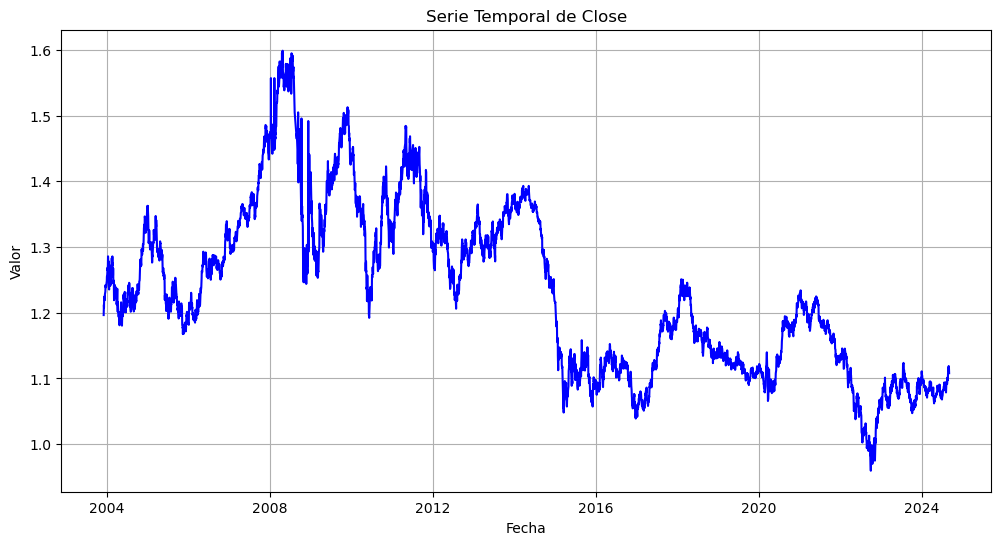

In [76]:
print_plot(eurusd, "Close")

In [77]:
fechas = pd.date_range(start="2003-12-01", end="2024-09-01", freq="D")
eurusd.loc[:,"fecha"] = pd.to_datetime(eurusd["fecha"])

df_fechas = pd.DataFrame(fechas, columns=["fecha"])

df_completo = pd.merge(df_fechas, eurusd, on="fecha", how="left")
df_completo["Close"] = df_completo["Close"].ffill()
eurusd = df_completo[["fecha", "Close"]]
eurusd = eurusd[eurusd["fecha"].isin(ibex["fecha"])]
eurusd.rename(columns={'Close': 'eurusd_close'}, inplace = True)
eurusd

,fecha,eurusd_close
0,2003-12-01,1.196501
1,2003-12-02,1.208897
2,2003-12-03,1.212298
3,2003-12-04,1.208094
4,2003-12-05,1.218695
...,...,...
7574,2024-08-26,1.118793
7575,2024-08-27,1.116470
7576,2024-08-28,1.117793
7577,2024-08-29,1.112496


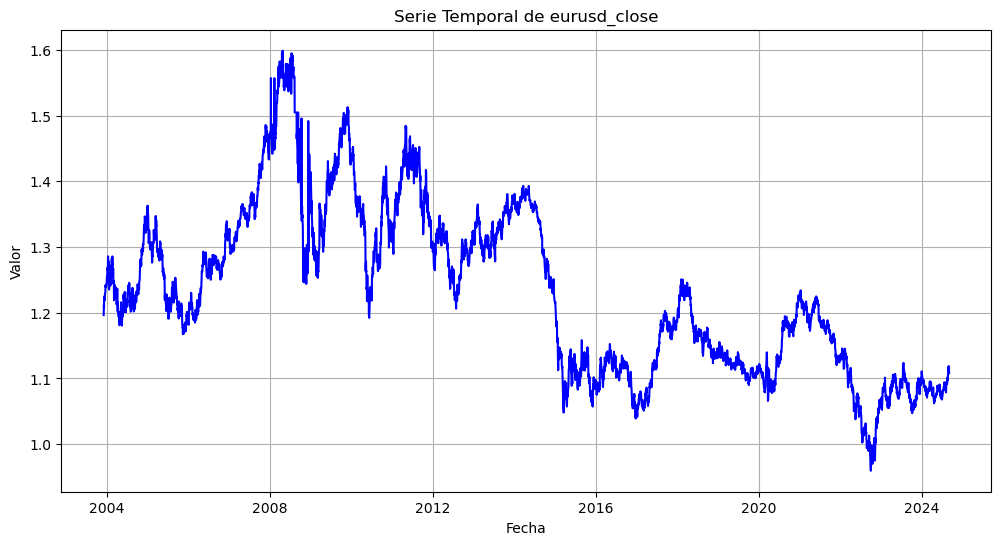

In [78]:
print_plot(eurusd, "eurusd_close")

**Observaciones**

No hubo cambios en el número de días, manteniéndose en 5386 tanto antes como después del preprocesamiento.

El rango abarca desde 2003/12/01 hasta 2024/08/30.

Los datos originalmente diarios fueron mantenidos con su frecuencia original, asegurando consistencia en la serie temporal.

## 3.10 Letras del tesoro a 3 meses

In [79]:
letras = pd.read_excel("datos/letras_tesoro_3m.xlsx")
letras

,Fecha de la subasta,Nominal solicitado Mill. €,Nominal adjudicado Mill. €,Tipo marginal,Tipo interés medio,Fecha vencimiento
0,2024-10-08,1554.06,468.98,0.03067,0.03054,2025-01-10
1,2024-09-10,1740.30,693.15,0.02860,0.02822,2024-12-06
2,2024-08-13,1496.16,490.76,0.03215,0.03190,2024-11-08
3,2024-07-09,1688.77,743.22,0.03325,0.03293,2024-10-04
4,2024-06-11,1911.22,500.00,0.03400,0.03374,2024-09-06
...,...,...,...,...,...,...
172,2010-05-25,3333.48,1062.48,0.00700,0.00645,2010-08-20
173,2010-04-27,3091.37,936.37,0.00549,0.00515,2010-07-23
174,2010-03-23,6897.67,1610.67,0.00334,0.00324,2010-06-18
175,2010-02-23,5598.33,930.33,0.00375,0.00364,2010-05-21


In [82]:
letras = letras.rename(columns={'Fecha de la subasta': 'fecha', 'Tipo interés medio': 'tim'})
letras = letras[(letras['fecha'] >= "2010-01-12") & (letras['fecha'] <= "2024-09-01")]
check_range_dates(letras, "2010-01-12", "2024-09-01", "MS")

The time series is missing the following dates:
DatetimeIndex(['2010-02-01', '2010-03-01', '2010-04-01', '2010-05-01',
               '2010-06-01', '2010-07-01', '2010-08-01', '2010-09-01',
               '2010-10-01', '2010-11-01',
               ...
               '2023-12-01', '2024-01-01', '2024-02-01', '2024-03-01',
               '2024-04-01', '2024-05-01', '2024-06-01', '2024-07-01',
               '2024-08-01', '2024-09-01'],
              dtype='datetime64[ns]', length=176, freq=None)


Rellenamos con ffill()

In [83]:
fechas = pd.date_range(start="2010-01-12", end="2024-09-01", freq="D")
letras.loc[:,"fecha"] = pd.to_datetime(letras["fecha"])

df_fechas = pd.DataFrame(fechas, columns=["fecha"])

df_completo = pd.merge(df_fechas, letras, on="fecha", how="left")
df_completo["tim"] = df_completo["tim"].ffill()
letras = df_completo[["fecha", "tim"]]
letras = letras[letras["fecha"].isin(ibex["fecha"])]
letras

,fecha,tim
0,2010-01-12,0.00369
1,2010-01-13,0.00369
2,2010-01-14,0.00369
3,2010-01-15,0.00369
6,2010-01-18,0.00369
...,...,...
5340,2024-08-26,0.03190
5341,2024-08-27,0.03190
5342,2024-08-28,0.03190
5343,2024-08-29,0.03190


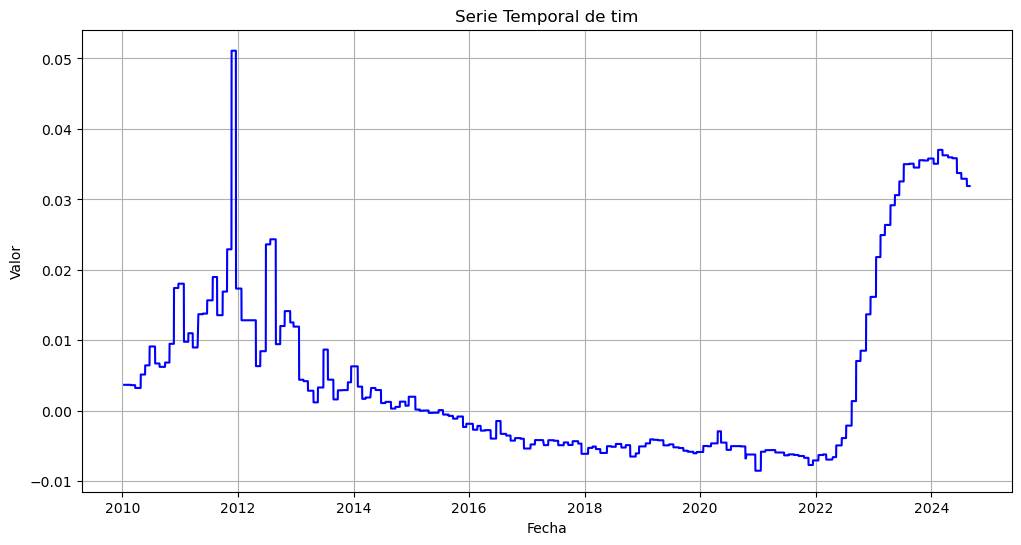

In [85]:
print_plot(letras, "tim")

**Observaciones**

Los días totales aumentaron de 177 a 3745 tras el preprocesamiento con ffill().

El rango abarca desde 2010/01/03 hasta 2024/08/30.

Los datos originalmente mensuales fueron transformados a una frecuencia diaria.

# 4. Resultado final

Combinamos todos los factores en un único df. 

In [90]:
ibex['fecha'] = pd.to_datetime(ibex['fecha'])
deuda['fecha'] = pd.to_datetime(deuda['fecha'])
gasto['fecha'] = pd.to_datetime(gasto['fecha'])
pib['fecha'] = pd.to_datetime(pib['fecha'])
desempleo['fecha'] = pd.to_datetime(desempleo['fecha'])
tie['fecha'] = pd.to_datetime(tie['fecha'])
ipc['fecha'] = pd.to_datetime(ipc['fecha'])
prima['fecha'] = pd.to_datetime(prima['fecha'])
eurusd['fecha'] = pd.to_datetime(eurusd['fecha'])
letras['fecha'] = pd.to_datetime(letras['fecha'])

df_combined = ibex

dfs = [deuda, gasto, pib, desempleo, tie, ipc, prima, eurusd, letras]

for df in dfs:
    df_combined = pd.merge(df_combined, df, on='fecha', how='left')
    
df_combined

,fecha,ibex_close,ibex_volume,deuda_perc_pib,gasto_perc_PIB,pib_trim_per_capita,tasa_desempleo,tie,ipc,prima,eurusd_close,tim
0,1994-01-03,3654.500000,0,NaN,44.83,2.700,22.2,NaN,1.01,248.0,NaN,NaN
1,1994-01-04,3630.300049,0,NaN,44.83,2.700,22.2,NaN,1.01,252.0,NaN,NaN
2,1994-01-05,3621.199951,0,NaN,44.83,2.700,22.2,NaN,1.01,256.0,NaN,NaN
3,1994-01-07,3636.399902,0,NaN,44.83,2.700,22.2,NaN,1.01,258.0,NaN,NaN
4,1994-01-10,3660.600098,0,NaN,44.83,2.700,22.2,NaN,1.01,255.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7763,2024-08-26,11265.500000,60317600,107.81,45.40,7.871,11.3,4.25,0.00,80.0,1.118793,0.0319
7764,2024-08-27,11326.900391,96013500,107.81,45.40,7.871,11.3,4.25,0.00,80.0,1.116470,0.0319
7765,2024-08-28,11332.000000,78994900,107.81,45.40,7.871,11.3,4.25,0.00,83.0,1.117793,0.0319
7766,2024-08-29,11358.599609,77347600,107.81,45.40,7.871,11.3,4.25,0.00,82.0,1.112496,0.0319


Guardamos el df final a full_df.csv que usaremos para el EDA.

In [455]:
df_combined.to_csv('datos/full_df.csv', index = False)

Preparamos el df llamado final_target.csv para trabajar con la predicción univariada.

In [ ]:
df_target = df_combined[["ibex_close"]]
df_target.to_csv("datos/final_target.csv", index = False)

Preparamos el archivo final_df_shifted.csv para guardar todos los factores, excepto la deuda, ya que esta tiene un rango de fechas diferente. Además, desplazamos el target (en este caso, ibex_close) para adelantarlo una posición. De este modo, nos aseguramos de que el modelo se entrene utilizando los factores exógenos del día actual con el objetivo de predecir el cierre del IBEX-35 del día siguiente. Es decir, cada día, cuando se cierre el IBEX-35, se realizará una predicción para el día siguiente teniendo en cuenta los factores exógenos que se hayan conocido ese mismo día.

In [ ]:
df_full = df_combined[["fecha", "ibex_close", "tasa_desempleo", "prima", "pib_trim_per_capita"]]
df_full.set_index("fecha", inplace = True)
df_full_shifted = df_full.copy()
df_full_shifted['ibex_close'] = df_full_shifted['ibex_close'].shift(-1)
df_full_shifted.dropna(inplace=True)
df_full_shifted.to_csv("datos/final_df_shifted.csv", index = False)

Hacemos lo mismo que el paso anterior pero incorporando la deuda pública.

In [ ]:
df_deuda = df_combined[["fecha", "ibex_close", "tasa_desempleo", "prima", "pib_trim_per_capita", "deuda_perc_pib"]].dropna()
df_deuda.set_index("fecha", inplace = True)
df_deuda_shifted = df_deuda.copy()
df_deuda_shifted['ibex_close'] = df_deuda_shifted['ibex_close'].shift(-1)
df_deuda_shifted.dropna(inplace=True)
df_deuda_shifted.to_csv("datos/final_deuda_shifted.csv", index = False)